In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#melihat semua row dan column
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#import standarscaller
from sklearn.preprocessing import StandardScaler, LabelEncoder

#import libraries untuk classification project
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#libraries for evaluation classification project
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score, ConfusionMatrixDisplay,plot_roc_curve,roc_auc_score,roc_curve

In [2]:
df = pd.read_csv('survey.csv')

In [3]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
df.shape

(1259, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [6]:
for column in df.columns:
    print(f"============= {column} =================")
    display(df[column].value_counts())
    print()

============= Timestamp =================


2014-08-27 12:44:51    2
2014-08-27 14:22:43    2
2014-08-27 12:31:41    2
2014-08-28 16:52:34    2
2014-08-27 17:33:52    2
2014-08-27 12:54:11    2
2014-08-27 15:55:07    2
2014-08-27 12:37:50    2
2014-08-27 15:23:51    2
2014-08-28 09:59:39    2
2014-08-27 15:24:47    2
2014-08-28 16:58:33    2
2014-08-27 12:43:28    2
2014-08-28 17:02:29    1
2014-08-28 16:56:57    1
2014-08-28 17:10:00    1
2014-08-28 16:17:09    1
2014-08-28 16:31:00    1
2014-08-28 16:42:49    1
2014-08-28 16:52:23    1
2014-08-28 17:09:03    1
2014-08-28 17:08:16    1
2014-08-28 16:54:49    1
2014-08-28 16:55:07    1
2014-08-28 16:55:31    1
2014-08-28 16:56:26    1
2014-08-28 17:07:39    1
2014-08-28 16:56:58    1
2014-08-28 17:02:27    1
2014-08-28 16:57:07    1
2014-08-28 17:07:28    1
2014-08-28 16:57:46    1
2014-08-28 16:57:49    1
2014-08-28 17:07:11    1
2014-08-28 15:56:47    1
2014-08-28 16:58:50    1
2014-08-28 17:03:42    1
2014-08-28 17:01:06    1
2014-08-28 17:01:21    1
2014-08-28 17:02:44    1



============= Age =================


 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 40             33
 39             33
 43             28
 22             21
 41             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 48              6
 50              6
 20              6
 51              5
 49              4
 56              4
 57              3
 54              3
 55              3
 47              2
 60              2
 99999999999     1
 5               1
-1               1
 11              1
 8               1
 61              1
 53              1
-29              1
-1726            1
 65              1
 62              1
 58              1
 329             1
 72         


============= Gender =================


Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter                      


============= Country =================


United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Thailand  


============= state =================


CA    138
WA     70
NY     57
TN     45
TX     44
OH     30
IL     29
OR     29
PA     29
IN     27
MI     22
MN     21
MA     20
FL     15
NC     14
VA     14
WI     12
GA     12
MO     12
UT     11
CO      9
MD      8
AL      8
AZ      7
OK      6
NJ      6
KY      5
SC      5
IA      4
CT      4
DC      4
NV      3
VT      3
SD      3
KS      3
NH      3
WY      2
NM      2
NE      2
WV      1
ID      1
MS      1
RI      1
LA      1
ME      1
Name: state, dtype: int64


============= self_employed =================


No     1095
Yes     146
Name: self_employed, dtype: int64


============= family_history =================


No     767
Yes    492
Name: family_history, dtype: int64


============= treatment =================


Yes    637
No     622
Name: treatment, dtype: int64


============= work_interfere =================


Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64


============= no_employees =================


6-25              290
26-100            289
More than 1000    282
100-500           176
1-5               162
500-1000           60
Name: no_employees, dtype: int64


============= remote_work =================


No     883
Yes    376
Name: remote_work, dtype: int64


============= tech_company =================


Yes    1031
No      228
Name: tech_company, dtype: int64


============= benefits =================


Yes           477
Don't know    408
No            374
Name: benefits, dtype: int64


============= care_options =================


No          501
Yes         444
Not sure    314
Name: care_options, dtype: int64


============= wellness_program =================


No            842
Yes           229
Don't know    188
Name: wellness_program, dtype: int64


============= seek_help =================


No            646
Don't know    363
Yes           250
Name: seek_help, dtype: int64


============= anonymity =================


Don't know    819
Yes           375
No             65
Name: anonymity, dtype: int64


============= leave =================


Don't know            563
Somewhat easy         266
Very easy             206
Somewhat difficult    126
Very difficult         98
Name: leave, dtype: int64


============= mental_health_consequence =================


No       490
Maybe    477
Yes      292
Name: mental_health_consequence, dtype: int64


============= phys_health_consequence =================


No       925
Maybe    273
Yes       61
Name: phys_health_consequence, dtype: int64


============= coworkers =================


Some of them    774
No              260
Yes             225
Name: coworkers, dtype: int64


============= supervisor =================


Yes             516
No              393
Some of them    350
Name: supervisor, dtype: int64


============= mental_health_interview =================


No       1008
Maybe     207
Yes        44
Name: mental_health_interview, dtype: int64


============= phys_health_interview =================


Maybe    557
No       500
Yes      202
Name: phys_health_interview, dtype: int64


============= mental_vs_physical =================


Don't know    576
Yes           343
No            340
Name: mental_vs_physical, dtype: int64


============= obs_consequence =================


No     1075
Yes     184
Name: obs_consequence, dtype: int64


============= comments =================


* Small family business - YMMV.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

### Data Cleaning (Age, Gender)

In [7]:
# Age
df = (df[(df.Age >= 17) & (df.Age <= 64)])

In [8]:
# Gender
df['Gender'] = df['Gender'].str.lower()

In [9]:
for column in df.columns:
    print(f"============= {column} =================")
    display(df[column].value_counts())
    print()

============= Timestamp =================


2014-08-27 12:44:51    2
2014-08-27 14:22:43    2
2014-08-28 16:52:34    2
2014-08-27 17:33:52    2
2014-08-27 12:54:11    2
2014-08-27 15:55:07    2
2014-08-27 12:37:50    2
2014-08-28 16:58:33    2
2014-08-28 09:59:39    2
2014-08-27 15:23:51    2
2014-08-27 12:31:41    2
2014-08-27 12:43:28    2
2014-08-28 15:54:35    1
2014-08-28 15:56:47    1
2014-08-28 16:09:35    1
2014-08-28 16:17:09    1
2014-08-28 16:31:00    1
2014-08-28 16:42:49    1
2014-08-28 16:52:23    1
2014-08-28 17:09:03    1
2014-08-28 17:08:16    1
2014-08-28 16:54:49    1
2014-08-28 16:55:07    1
2014-08-28 17:07:39    1
2014-08-28 16:55:31    1
2014-08-28 16:56:26    1
2014-08-28 17:02:56    1
2014-08-28 17:02:29    1
2014-08-28 16:56:58    1
2014-08-28 16:57:07    1
2014-08-28 17:07:28    1
2014-08-28 16:57:46    1
2014-08-28 15:50:44    1
2014-08-28 16:57:49    1
2014-08-28 17:07:11    1
2014-08-28 16:58:50    1
2014-08-28 17:01:06    1
2014-08-28 17:03:42    1
2014-08-28 17:01:21    1
2014-08-28 17:01:25    1



============= Age =================


29    85
32    82
26    75
27    71
33    70
28    68
31    67
34    65
30    63
25    61
35    55
23    51
24    46
37    43
38    39
36    37
40    33
39    33
43    28
22    21
41    21
42    20
21    16
45    12
46    12
44    11
19     9
18     7
50     6
48     6
20     6
51     5
56     4
49     4
57     3
55     3
54     3
47     2
60     2
58     1
62     1
53     1
61     1
Name: Age, dtype: int64


============= Gender =================


male                                              815
female                                            182
m                                                 150
f                                                  53
woman                                               4
make                                                4
male                                                3
cis male                                            3
female                                              2
man                                                 2
female (trans)                                      2
msle                                                1
male leaning androgynous                            1
trans woman                                         1
queer                                               1
neuter                                              1
cis-female/femme                                    1
female (cis)                                        1
mail                        


============= Country =================


United States             744
United Kingdom            184
Canada                     72
Germany                    45
Netherlands                27
Ireland                    27
Australia                  21
France                     13
India                      10
New Zealand                 8
Italy                       7
Poland                      7
Sweden                      7
Switzerland                 7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Mexico                      3
Russia                      3
Finland                     3
Austria                     3
Denmark                     2
Greece                      2
Portugal                    2
Colombia                    2
Croatia                     2
Moldova                     1
Georgia                     1
China                       1
Thailand                    1
Czech Repu


============= state =================


CA    138
WA     70
NY     57
TN     45
TX     44
OR     29
PA     29
IL     28
OH     27
IN     26
MI     22
MN     20
MA     20
NC     14
VA     14
FL     14
WI     12
GA     12
MO     12
UT     11
CO      9
MD      8
AL      7
AZ      7
OK      6
NJ      6
KY      5
SC      5
IA      4
CT      4
DC      4
NV      3
VT      3
SD      3
KS      3
NH      3
WY      2
NM      2
NE      2
WV      1
ID      1
MS      1
RI      1
LA      1
ME      1
Name: state, dtype: int64


============= self_employed =================


No     1090
Yes     141
Name: self_employed, dtype: int64


============= family_history =================


No     761
Yes    488
Name: family_history, dtype: int64


============= treatment =================


Yes    631
No     618
Name: treatment, dtype: int64


============= work_interfere =================


Sometimes    464
Never        211
Rarely       173
Often        140
Name: work_interfere, dtype: int64


============= no_employees =================


6-25              288
26-100            288
More than 1000    281
100-500           175
1-5               158
500-1000           59
Name: no_employees, dtype: int64


============= remote_work =================


No     880
Yes    369
Name: remote_work, dtype: int64


============= tech_company =================


Yes    1025
No      224
Name: tech_company, dtype: int64


============= benefits =================


Yes           472
Don't know    407
No            370
Name: benefits, dtype: int64


============= care_options =================


No          498
Yes         439
Not sure    312
Name: care_options, dtype: int64


============= wellness_program =================


No            836
Yes           227
Don't know    186
Name: wellness_program, dtype: int64


============= seek_help =================


No            640
Don't know    363
Yes           246
Name: seek_help, dtype: int64


============= anonymity =================


Don't know    813
Yes           372
No             64
Name: anonymity, dtype: int64


============= leave =================


Don't know            561
Somewhat easy         264
Very easy             202
Somewhat difficult    125
Very difficult         97
Name: leave, dtype: int64


============= mental_health_consequence =================


No       487
Maybe    474
Yes      288
Name: mental_health_consequence, dtype: int64


============= phys_health_consequence =================


No       919
Maybe    272
Yes       58
Name: phys_health_consequence, dtype: int64


============= coworkers =================


Some of them    769
No              258
Yes             222
Name: coworkers, dtype: int64


============= supervisor =================


Yes             511
No              389
Some of them    349
Name: supervisor, dtype: int64


============= mental_health_interview =================


No       1001
Maybe     207
Yes        41
Name: mental_health_interview, dtype: int64


============= phys_health_interview =================


Maybe    555
No       494
Yes      200
Name: phys_health_interview, dtype: int64


============= mental_vs_physical =================


Don't know    573
Yes           338
No            338
Name: mental_vs_physical, dtype: int64


============= obs_consequence =================


No     1069
Yes     180
Name: obs_consequence, dtype: int64


============= comments =================


* Small family business - YMMV.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [10]:
def gender_column(x):
    if x == 'male' or x=='m' or x=='man':
        return 'Male'
    elif x == 'woman' or x=='f' or x=='female':
        return 'Female'
    else :
        return 'Other'

In [11]:
df['Gender'] = df['Gender'].apply(lambda x: gender_column(x))

In [12]:
for column in df.columns:
    print(f"============= {column} =================")
    display(df[column].value_counts())
    print()

============= Timestamp =================


2014-08-27 12:44:51    2
2014-08-27 14:22:43    2
2014-08-28 16:52:34    2
2014-08-27 17:33:52    2
2014-08-27 12:54:11    2
2014-08-27 15:55:07    2
2014-08-27 12:37:50    2
2014-08-28 16:58:33    2
2014-08-28 09:59:39    2
2014-08-27 15:23:51    2
2014-08-27 12:31:41    2
2014-08-27 12:43:28    2
2014-08-28 15:54:35    1
2014-08-28 15:56:47    1
2014-08-28 16:09:35    1
2014-08-28 16:17:09    1
2014-08-28 16:31:00    1
2014-08-28 16:42:49    1
2014-08-28 16:52:23    1
2014-08-28 17:09:03    1
2014-08-28 17:08:16    1
2014-08-28 16:54:49    1
2014-08-28 16:55:07    1
2014-08-28 17:07:39    1
2014-08-28 16:55:31    1
2014-08-28 16:56:26    1
2014-08-28 17:02:56    1
2014-08-28 17:02:29    1
2014-08-28 16:56:58    1
2014-08-28 16:57:07    1
2014-08-28 17:07:28    1
2014-08-28 16:57:46    1
2014-08-28 15:50:44    1
2014-08-28 16:57:49    1
2014-08-28 17:07:11    1
2014-08-28 16:58:50    1
2014-08-28 17:01:06    1
2014-08-28 17:03:42    1
2014-08-28 17:01:21    1
2014-08-28 17:01:25    1



============= Age =================


29    85
32    82
26    75
27    71
33    70
28    68
31    67
34    65
30    63
25    61
35    55
23    51
24    46
37    43
38    39
36    37
40    33
39    33
43    28
22    21
41    21
42    20
21    16
45    12
46    12
44    11
19     9
18     7
50     6
48     6
20     6
51     5
56     4
49     4
57     3
55     3
54     3
47     2
60     2
58     1
62     1
53     1
61     1
Name: Age, dtype: int64


============= Gender =================


Male      967
Female    239
Other      43
Name: Gender, dtype: int64


============= Country =================


United States             744
United Kingdom            184
Canada                     72
Germany                    45
Netherlands                27
Ireland                    27
Australia                  21
France                     13
India                      10
New Zealand                 8
Italy                       7
Poland                      7
Sweden                      7
Switzerland                 7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Mexico                      3
Russia                      3
Finland                     3
Austria                     3
Denmark                     2
Greece                      2
Portugal                    2
Colombia                    2
Croatia                     2
Moldova                     1
Georgia                     1
China                       1
Thailand                    1
Czech Repu


============= state =================


CA    138
WA     70
NY     57
TN     45
TX     44
OR     29
PA     29
IL     28
OH     27
IN     26
MI     22
MN     20
MA     20
NC     14
VA     14
FL     14
WI     12
GA     12
MO     12
UT     11
CO      9
MD      8
AL      7
AZ      7
OK      6
NJ      6
KY      5
SC      5
IA      4
CT      4
DC      4
NV      3
VT      3
SD      3
KS      3
NH      3
WY      2
NM      2
NE      2
WV      1
ID      1
MS      1
RI      1
LA      1
ME      1
Name: state, dtype: int64


============= self_employed =================


No     1090
Yes     141
Name: self_employed, dtype: int64


============= family_history =================


No     761
Yes    488
Name: family_history, dtype: int64


============= treatment =================


Yes    631
No     618
Name: treatment, dtype: int64


============= work_interfere =================


Sometimes    464
Never        211
Rarely       173
Often        140
Name: work_interfere, dtype: int64


============= no_employees =================


6-25              288
26-100            288
More than 1000    281
100-500           175
1-5               158
500-1000           59
Name: no_employees, dtype: int64


============= remote_work =================


No     880
Yes    369
Name: remote_work, dtype: int64


============= tech_company =================


Yes    1025
No      224
Name: tech_company, dtype: int64


============= benefits =================


Yes           472
Don't know    407
No            370
Name: benefits, dtype: int64


============= care_options =================


No          498
Yes         439
Not sure    312
Name: care_options, dtype: int64


============= wellness_program =================


No            836
Yes           227
Don't know    186
Name: wellness_program, dtype: int64


============= seek_help =================


No            640
Don't know    363
Yes           246
Name: seek_help, dtype: int64


============= anonymity =================


Don't know    813
Yes           372
No             64
Name: anonymity, dtype: int64


============= leave =================


Don't know            561
Somewhat easy         264
Very easy             202
Somewhat difficult    125
Very difficult         97
Name: leave, dtype: int64


============= mental_health_consequence =================


No       487
Maybe    474
Yes      288
Name: mental_health_consequence, dtype: int64


============= phys_health_consequence =================


No       919
Maybe    272
Yes       58
Name: phys_health_consequence, dtype: int64


============= coworkers =================


Some of them    769
No              258
Yes             222
Name: coworkers, dtype: int64


============= supervisor =================


Yes             511
No              389
Some of them    349
Name: supervisor, dtype: int64


============= mental_health_interview =================


No       1001
Maybe     207
Yes        41
Name: mental_health_interview, dtype: int64


============= phys_health_interview =================


Maybe    555
No       494
Yes      200
Name: phys_health_interview, dtype: int64


============= mental_vs_physical =================


Don't know    573
Yes           338
No            338
Name: mental_vs_physical, dtype: int64


============= obs_consequence =================


No     1069
Yes     180
Name: obs_consequence, dtype: int64


============= comments =================


* Small family business - YMMV.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

### Drop Duplicated Data

In [13]:
print("Before drop duplicated data")
df.shape

Before drop duplicated data


(1249, 27)

In [14]:
df = df.drop_duplicates(keep='first')

In [15]:
print("After drop duplicated data")
df.shape

After drop duplicated data


(1249, 27)

# MISSING VALUES

*CHECKING MISSING VALUES*





In [16]:
df.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         513
self_employed                  18
family_history                  0
treatment                       0
work_interfere                261
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1088
dtype: int64

In [17]:
column=['Timestamp','comments']
df = df.drop(columns=column)

## Handling missing values(drop, mode)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1249 non-null   int64 
 1   Gender                     1249 non-null   object
 2   Country                    1249 non-null   object
 3   state                      736 non-null    object
 4   self_employed              1231 non-null   object
 5   family_history             1249 non-null   object
 6   treatment                  1249 non-null   object
 7   work_interfere             988 non-null    object
 8   no_employees               1249 non-null   object
 9   remote_work                1249 non-null   object
 10  tech_company               1249 non-null   object
 11  benefits                   1249 non-null   object
 12  care_options               1249 non-null   object
 13  wellness_program           1249 non-null   object
 14  seek_hel

In [19]:
#split data -> prevent data leakage
train , test = train_test_split(df,test_size=0.2, random_state=42)

there are state, self_employed,work_interfere have missing value. Let's split it then do with mode handling missing value

In [20]:
df.isna().sum()

Age                            0
Gender                         0
Country                        0
state                        513
self_employed                 18
family_history                 0
treatment                      0
work_interfere               261
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

### Handling Missing Value in data train

In [21]:
100 * len(train[train['state'].isna()]) / len(train)

41.44144144144144

In [22]:
100 * len(train[train['work_interfere'].isna()]) / len(train)

21.22122122122122

In [23]:
100 * len(train[train['self_employed'].isna()]) / len(train)

1.7017017017017018

Because of > 30% data in state has missing value, so we drop both in data train and test that contains state columns. Both dataset must have same columns

In [24]:
train = train.drop(columns=['state'])
test = test.drop(columns=['state'])

In [25]:
# Mode imputation on self_employed column

mode_self_employed = train[~train['self_employed'].isna()]['self_employed'].mode()[0]
train['self_employed'] = train['self_employed'].fillna(mode_self_employed)

In [26]:
mode_self_employed

'No'

In [27]:
# Mode imputation on work_interfere column

mode_work_interfere = train[~train['work_interfere'].isna()]['self_employed'].mode()[0]
train['work_interfere'] = train['work_interfere'].fillna(mode_work_interfere)

### Handling Missing Value in data test

In [28]:
# Mode imputation on self_employed column
test['self_employed'] = test['self_employed'].fillna(mode_self_employed)

In [29]:
# Mode imputation on self_employed column
test['work_interfere'] = test['work_interfere'].fillna(mode_work_interfere)

In [30]:
train.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [31]:
test.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [32]:
#concat train and test
df = pd.concat([train,test],axis=0) 

<AxesSubplot:xlabel='Age', ylabel='Count'>

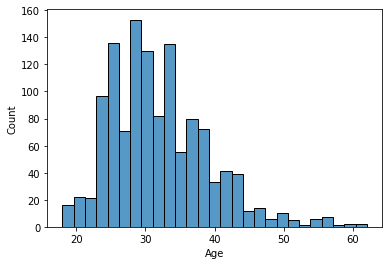

In [33]:
sns.histplot(df['Age'])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

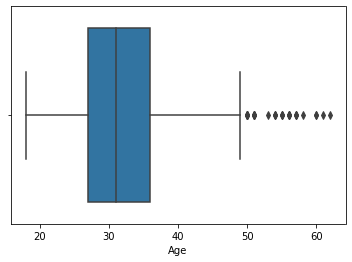

In [34]:
# Check outliers using boxplot
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(df['Age'])

Because of <10.000 data, so we must not remove outliers in statistics.

## Standardized

In [35]:
# Standardize Age using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [36]:
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
931,0.277439,Male,United States,No,No,No,Often,1-5,No,Yes,Don't know,No,No,Yes,Don't know,Very easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1025,1.397509,Male,United States,No,Yes,Yes,Sometimes,6-25,Yes,Yes,Don't know,No,No,Don't know,Don't know,Don't know,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No
1121,1.677526,Male,United Kingdom,No,No,Yes,Sometimes,More than 1000,No,No,No,No,No,Yes,Don't know,Don't know,Maybe,No,Some of them,Some of them,No,No,No,No
1014,-0.142587,Male,United States,No,No,No,Sometimes,More than 1000,No,Yes,Yes,Not sure,Yes,Yes,Yes,Don't know,Yes,Maybe,Some of them,Some of them,No,Maybe,Yes,No
1039,0.417448,Male,United States,No,No,No,No,6-25,Yes,Yes,No,No,No,No,Don't know,Don't know,No,No,No,No,No,No,Don't know,No


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 931 to 353
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1249 non-null   float64
 1   Gender                     1249 non-null   object 
 2   Country                    1249 non-null   object 
 3   self_employed              1249 non-null   object 
 4   family_history             1249 non-null   object 
 5   treatment                  1249 non-null   object 
 6   work_interfere             1249 non-null   object 
 7   no_employees               1249 non-null   object 
 8   remote_work                1249 non-null   object 
 9   tech_company               1249 non-null   object 
 10  benefits                   1249 non-null   object 
 11  care_options               1249 non-null   object 
 12  wellness_program           1249 non-null   object 
 13  seek_help                  1249 non-null   obje

<AxesSubplot:xlabel='Age', ylabel='Count'>

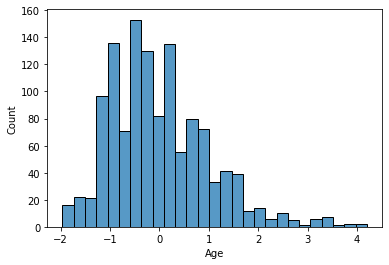

In [38]:
sns.histplot(df['Age'])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

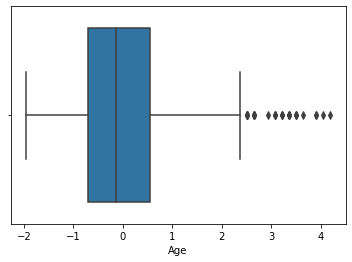

In [39]:
# Check outliers using boxplot
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(df['Age'])

## Imbalanced Data

In [40]:
df['self_employed'].value_counts()

No     1108
Yes     141
Name: self_employed, dtype: int64

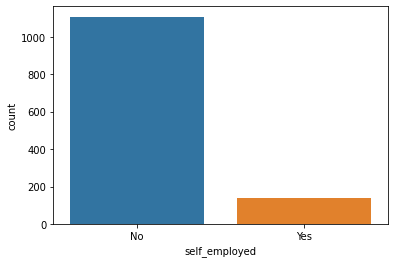

In [41]:
sns.countplot(x="self_employed",data=df);

### Encoding Categorical Data

In [42]:
for column in df.columns:
    print(f"============= {column} =================")
    display(df[column].value_counts())
    print()

============= Age =================


-0.422604    85
-0.002578    82
-0.842630    75
-0.702622    71
 0.137430    70
-0.562613    68
-0.142587    67
 0.277439    65
-0.282596    63
-0.982639    61
 0.417448    55
-1.262656    51
-1.122648    46
 0.697465    43
 0.837474    39
 0.557457    37
 1.117491    33
 0.977483    33
 1.537517    28
-1.402665    21
 1.257500    21
 1.397509    20
-1.542674    16
 1.817535    12
 1.957543    12
 1.677526    11
-1.822691     9
-1.962700     7
 2.237561     6
 2.517578     6
-1.682683     6
 2.657587     5
 3.357630     4
 2.377570     4
 3.217622     3
 3.077613     3
 3.497639     3
 3.917665     2
 2.097552     2
 3.637648     1
 4.197683     1
 4.057674     1
 2.937604     1
Name: Age, dtype: int64


============= Gender =================


Male      967
Female    239
Other      43
Name: Gender, dtype: int64


============= Country =================


United States             744
United Kingdom            184
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Brazil                      6
Belgium                     6
Israel                      5
Singapore                   4
Bulgaria                    4
Mexico                      3
Finland                     3
Austria                     3
Russia                      3
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Denmark                     2
Moldova                     1
China                       1
Thailand                    1
Bosnia and Herzegovina      1
Uruguay   


============= self_employed =================


No     1108
Yes     141
Name: self_employed, dtype: int64


============= family_history =================


No     761
Yes    488
Name: family_history, dtype: int64


============= treatment =================


Yes    631
No     618
Name: treatment, dtype: int64


============= work_interfere =================


Sometimes    464
No           261
Never        211
Rarely       173
Often        140
Name: work_interfere, dtype: int64


============= no_employees =================


6-25              288
26-100            288
More than 1000    281
100-500           175
1-5               158
500-1000           59
Name: no_employees, dtype: int64


============= remote_work =================


No     880
Yes    369
Name: remote_work, dtype: int64


============= tech_company =================


Yes    1025
No      224
Name: tech_company, dtype: int64


============= benefits =================


Yes           472
Don't know    407
No            370
Name: benefits, dtype: int64


============= care_options =================


No          498
Yes         439
Not sure    312
Name: care_options, dtype: int64


============= wellness_program =================


No            836
Yes           227
Don't know    186
Name: wellness_program, dtype: int64


============= seek_help =================


No            640
Don't know    363
Yes           246
Name: seek_help, dtype: int64


============= anonymity =================


Don't know    813
Yes           372
No             64
Name: anonymity, dtype: int64


============= leave =================


Don't know            561
Somewhat easy         264
Very easy             202
Somewhat difficult    125
Very difficult         97
Name: leave, dtype: int64


============= mental_health_consequence =================


No       487
Maybe    474
Yes      288
Name: mental_health_consequence, dtype: int64


============= phys_health_consequence =================


No       919
Maybe    272
Yes       58
Name: phys_health_consequence, dtype: int64


============= coworkers =================


Some of them    769
No              258
Yes             222
Name: coworkers, dtype: int64


============= supervisor =================


Yes             511
No              389
Some of them    349
Name: supervisor, dtype: int64


============= mental_health_interview =================


No       1001
Maybe     207
Yes        41
Name: mental_health_interview, dtype: int64


============= phys_health_interview =================


Maybe    555
No       494
Yes      200
Name: phys_health_interview, dtype: int64


============= mental_vs_physical =================


Don't know    573
Yes           338
No            338
Name: mental_vs_physical, dtype: int64


============= obs_consequence =================


No     1069
Yes     180
Name: obs_consequence, dtype: int64

1. One Hot Encoding (OHE) : Gender, benefits, wellness_program, care_options, seek_help, anonymity, mental_health_consequence, phys_health_consequence, coworkers, supervisor, mental_health_interview, phys_health_interview, mental_vs_physical, work_interfere, leave, 
2. Frequency Encoding : Country, no_employees
3. Dictionary Encoding : self_employed, treatment,remote_work,tech_company, obs_consequence, family_history 

In [43]:
#OHE
col_ohe = ['Gender', 'benefits', 'wellness_program', 'care_options', 'seek_help', 'anonymity', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical','work_interfere', 'leave']
#import pandas as pd
df = pd.get_dummies(df, columns = col_ohe)

In [44]:
#Dictionary Encoding 
def dct_encoding(df):
    df = df.copy()
    
  #encoding educational requirement
    mapping_dictionary = {
        
                "self_employed" :
                    {
                        "Yes" : 1,
                        "No" : 0
                    },
                "treatment" :
                    {
                        "Yes" : 1,
                        "No" : 0
                    },
                "remote_work" :
                    {
                        "Yes" : 1,
                        "No" : 0
                    },
                "tech_company" :
                    {
                        "Yes" : 1,
                        "No" : 0
                    },
                "obs_consequence" :
                    {
                        "Yes" : 1,
                        "No" : 0
                    },
                "family_history" :
                    {
                        "Yes" : 1,
                        "No" : 0
                    }        
                          }
    
    df.replace(mapping_dictionary , inplace=True)
    
    return df

In [45]:
#Dictionary Encoding
df = dct_encoding(df)

#### Frequency Encoding

In [46]:
### Country
freq_c = df['Country'].value_counts().reset_index()
freq_c

,index,Country
0,United States,744
1,United Kingdom,184
2,Canada,72
3,Germany,45
4,Ireland,27
5,Netherlands,27
6,Australia,21
7,France,13
8,India,10
9,New Zealand,8


In [47]:
freq_c.rename(columns={"index": "Country", "Country": "freq_c"}, inplace = True)
freq_c

,Country,freq_c
0,United States,744
1,United Kingdom,184
2,Canada,72
3,Germany,45
4,Ireland,27
5,Netherlands,27
6,Australia,21
7,France,13
8,India,10
9,New Zealand,8


In [48]:
freq_c['percent_country'] = round((freq_c['freq_c']/freq_c['freq_c'].sum())*100,2)
freq_c

,Country,freq_c,percent_country
0,United States,744,59.57
1,United Kingdom,184,14.73
2,Canada,72,5.76
3,Germany,45,3.60
4,Ireland,27,2.16
5,Netherlands,27,2.16
6,Australia,21,1.68
7,France,13,1.04
8,India,10,0.80
9,New Zealand,8,0.64


In [49]:
df = df.merge(freq_c[['Country','percent_country']], on='Country', how='inner')

In [50]:
df[['Country','percent_country']]

,Country,percent_country
0,United States,59.57
1,United States,59.57
2,United States,59.57
3,United States,59.57
4,United States,59.57
5,United States,59.57
6,United States,59.57
7,United States,59.57
8,United States,59.57
9,United States,59.57


In [51]:
### no_employees
freq_et = df['no_employees'].value_counts().reset_index()
freq_et.rename(columns={"index": "no_employees", "no_employees": "freq_emply"}, inplace = True)
freq_et['percent_emply'] = round((freq_et['freq_emply']/freq_et['freq_emply'].sum())*100,2)
freq_et

,no_employees,freq_emply,percent_emply
0,6-25,288,23.06
1,26-100,288,23.06
2,More than 1000,281,22.50
3,100-500,175,14.01
4,1-5,158,12.65
5,500-1000,59,4.72


In [52]:
df = df.merge(freq_et[['no_employees','percent_emply']], on='no_employees', how='inner')
df[['no_employees','percent_emply']]

,no_employees,percent_emply
0,1-5,12.65
1,1-5,12.65
2,1-5,12.65
3,1-5,12.65
4,1-5,12.65
5,1-5,12.65
6,1-5,12.65
7,1-5,12.65
8,1-5,12.65
9,1-5,12.65


In [53]:
#drop
df = df.drop(['Country', 'no_employees'], axis=1)

In [54]:
df.head()

,Age,self_employed,family_history,treatment,remote_work,tech_company,obs_consequence,Gender_Female,Gender_Male,Gender_Other,benefits_Don't know,benefits_No,benefits_Yes,wellness_program_Don't know,wellness_program_No,wellness_program_Yes,care_options_No,care_options_Not sure,care_options_Yes,seek_help_Don't know,seek_help_No,seek_help_Yes,anonymity_Don't know,anonymity_No,anonymity_Yes,mental_health_consequence_Maybe,mental_health_consequence_No,mental_health_consequence_Yes,phys_health_consequence_Maybe,phys_health_consequence_No,phys_health_consequence_Yes,coworkers_No,coworkers_Some of them,coworkers_Yes,supervisor_No,supervisor_Some of them,supervisor_Yes,mental_health_interview_Maybe,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_Maybe,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_Don't know,mental_vs_physical_No,mental_vs_physical_Yes,work_interfere_Never,work_interfere_No,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,leave_Don't know,leave_Somewhat difficult,leave_Somewhat easy,leave_Very difficult,leave_Very easy,percent_country,percent_emply
0,0.277439,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,59.57,12.65
1,-0.282596,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,59.57,12.65
2,-0.002578,1,1,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,59.57,12.65
3,-0.982639,1,1,1,1,1,1,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,59.57,12.65
4,-0.282596,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,59.57,12.65


### Data Splitting (with UnderSampling)

In [55]:
# Assign 'TARGET' column to y 
y = df['self_employed'].values
# Assign all columns except 'TARGET' to X
X = df.drop(['self_employed'], axis = 1).values

In [56]:
from imblearn import under_sampling, over_sampling

#X = df_numeric.drop(['survived'],axis=1)
#y = df_numeric['survived']

# Undersampling
X_under, y_under = under_sampling.RandomUnderSampler().fit_resample(X, y)

# Overampling
#X_over, y_over = over_sampling.RandomOverSampler().fit_resample(X, y)

# Overampling with smote
#X_over_smote, y_over_smote = over_sampling.SMOTE().fit_resample(X, y)

In [57]:
#Split data into Train and Test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2,random_state =42)
print("X_train dataset: ", x_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", x_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (225, 57)
y_train dataset:  (225,)
X_test dataset:  (57, 57)
y_test dataset:  (57,)


## 1. KNN

In [58]:
# %%KNN Classification
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) #set K neighbor as 3
knn.fit(x_train,y_train) #MACHINE LEARNING SEDANG DALAM PROSES BELAJAR
predicted_y = knn.predict(x_test)
print("KNN accuracy according to K=3 is :",knn.score(x_test,y_test))

KNN accuracy according to K=3 is : 0.8070175438596491


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

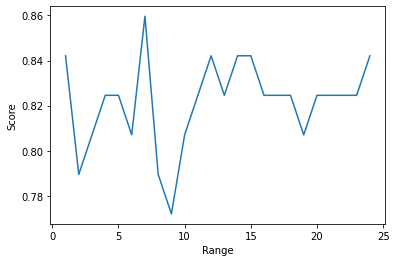

In [59]:
score_array = []
for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each) #set K neighbor as 3
    knn_loop.fit(x_train,y_train)
    score_array.append(knn_loop.score(x_test,y_test))
    
plt.plot(range(1,25),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

In [60]:
knn_model = KNeighborsClassifier(n_neighbors = 7) #set K neighbor
knn_model.fit(x_train,y_train)
predicted_y = knn_model.predict(x_test)
accuracy_knn = knn_model.score(x_test,y_test)
print("KNN accuracy according to K=7 is :",accuracy_knn)

KNN accuracy according to K=7 is : 0.8596491228070176


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

### 2. Logistic Regression

In [61]:
# %%Logistic regression classification
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
accuracy_lr = lr_model.score(x_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.8421052631578947


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 3. Decision Tree Classification

In [62]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
accuracy_dt = dt_model.score(x_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.8596491228070176


### 4. Random Forest

In [63]:
#Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf_model_initial = RandomForestClassifier(n_estimators = 5, random_state = 1)
rf_model_initial.fit(x_train,y_train)
print("Random Forest accuracy for 5 trees is :",rf_model_initial.score(x_test,y_test))

Random Forest accuracy for 5 trees is : 0.8771929824561403


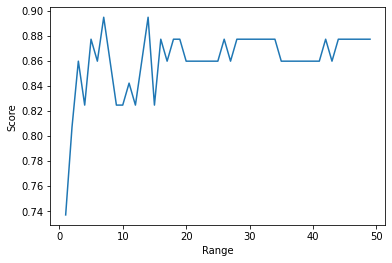

In [64]:
score_array = []
for each in range(1,50):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) #set K neighbor as 3
    rf_loop.fit(x_train,y_train)
    score_array.append(rf_loop.score(x_test,y_test))
    
plt.plot(range(1,50),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

In [77]:
rf_model = RandomForestClassifier(n_estimators = 7, random_state = 1) #set tree number
rf_model.fit(x_train,y_train)
accuracy_rf = rf_model.score(x_test,y_test)
print("Random Forest accuracy for 7 trees is :",accuracy_rf)

Random Forest accuracy for 7 trees is : 0.8947368421052632


### 5. Naive Bayes

In [66]:
#Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)
accuracy_nb = nb_model.score(x_test,y_test)
print("Naive Bayes accuracy is :",accuracy_nb)

Naive Bayes accuracy is : 0.8596491228070176


### Model Evaluation

In [67]:
def model_evaluation(model,name):
    confusion_matrix = pd.crosstab(y_test, model, rownames=['Actual'], colnames=['Predicted'], margins = True)
    sns.heatmap(confusion_matrix, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('Prediction label')
    plt.ylabel('True Label');
    plt.title(name)
    plt.yticks([0.5,1.5], [ 'NO', 'YES'],va='center')
    plt.xticks([0.5,1.5], [ 'NO', 'YES'],va='center')
    plt.show()

In [68]:
# the function that prints all scores
def print_scores(headline, y_true, y_pred):
    print(headline)
    acc_score = accuracy_score(y_true, y_pred)
    print("accuracy: ",acc_score)
    pre_score = precision_score(y_true, y_pred)
    print("precision: ",pre_score)
    rec_score = recall_score(y_true, y_pred)                            
    print("recall: ",rec_score)
    f_score = f1_score(y_true, y_pred, average='weighted')
    print("f1_score: ",f_score)

In [69]:
print_scores("========Logistic Regression=========;",y_test, lr_model.predict(x_test))
print('========================')
print_scores("=========Naive Bayes=========;",y_test, nb_model.predict(x_test))
print('========================')
print_scores("=========Decision Tree=========;",y_test, dt_model.predict(x_test))
print('========================')
print_scores("=========Random Forest=========;",y_test, rf_model.predict(x_test))
print_scores("=========KNN=========;",y_test, knn.predict(x_test))
print('========================')

========Logistic Regression=========;
accuracy:  0.8421052631578947
precision:  0.8928571428571429
recall:  0.8064516129032258
f1_score:  0.8423972102830263
=========Naive Bayes=========;
accuracy:  0.8596491228070176
precision:  0.896551724137931
recall:  0.8387096774193549
f1_score:  0.8599090318388564
=========Decision Tree=========;
accuracy:  0.8596491228070176
precision:  0.8709677419354839
recall:  0.8709677419354839
f1_score:  0.8596491228070176
=========Random Forest=========;
accuracy:  0.8596491228070176
precision:  0.8709677419354839
recall:  0.8709677419354839
f1_score:  0.8596491228070176
=========KNN=========;
accuracy:  0.8070175438596491
precision:  0.8125
recall:  0.8387096774193549
f1_score:  0.8066571657902926


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


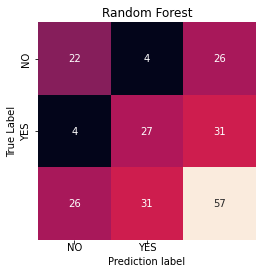

In [70]:
model_evaluation(rf_model.predict(x_test),"Random Forest")

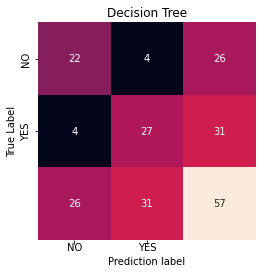

In [71]:
model_evaluation(dt_model.predict(x_test),"Decision Tree")

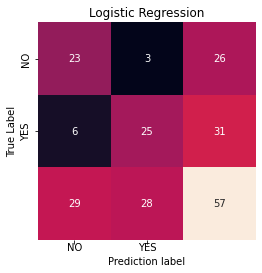

In [72]:
lr_y_pred = lr_model.predict(x_test)
model_evaluation(lr_y_pred,"Logistic Regression")

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


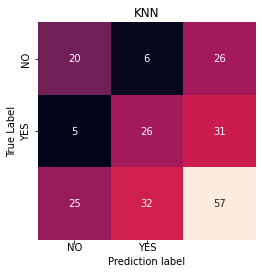

In [73]:
knn_model =  knn.predict(x_test)
model_evaluation(knn_model,"KNN")

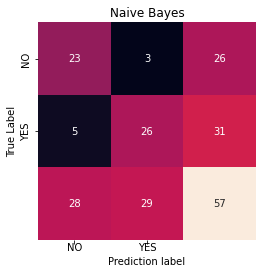

In [74]:
model_evaluation(nb_model.predict(x_test),"Naive Bayes")